In [27]:
import json
from functools import partial
from operator import itemgetter
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
with open('telegram_bot.json') as f:
    freelancers = sorted(json.load(f), key=itemgetter('rank'))
len(freelancers)

286

In [3]:
freelancers[0]

{'name': 'Yuriy Z.',
 'profile_link': '/o/profiles/users/_~0118e6ba0f89102fd3',
 'page': 1,
 'rank': 1,
 'page_link': 'https://www.upwork.com/o/profiles/browse/?q=telegram+bot',
 'data': 'linkClicked($event, \'name\', {"recno":18014013,"ciphertext":"~0118e6ba0f89102fd3","shortName":"Yuriy Z.","title":"JavaScript & Telegram Bot API \\/ Chatbot Developer","description":"Hello, my name is Yuriy Zahreva, I am JavaScript developer from Lviv, Ukraine.\\nYou may rest assured that my \\u21161 goal will always be to meet your needs,expectations and deadline. When working on a new project, I like to talk with the client, so that I can have a clear understanding of his\\/her demands, wishes and a vision of the project. I\'m honest and diligent in this issue.\\n\\nTechnical Qualification:\\n- HTML & CSS: Sass (libsass\\/node-sass with), Less, PostCSS (included Autoprefixer). Work with grids and frameworks like Bootstrap 2,3 & 4 and Bulma. \\n- JS Core: Browser HTML5 API, ECMAScript 3\\/5 & 6+.\\n-

In [4]:
def extract_data(data):
    return json.loads(data[data.find('{'):data.rfind('}') + 1])

In [5]:
extract_data(freelancers[0]['data'])

{'recno': 18014013,
 'ciphertext': '~0118e6ba0f89102fd3',
 'shortName': 'Yuriy Z.',
 'title': 'JavaScript & Telegram Bot API / Chatbot Developer',
 'description': "Hello, my name is Yuriy Zahreva, I am JavaScript developer from Lviv, Ukraine.\nYou may rest assured that my №1 goal will always be to meet your needs,expectations and deadline. When working on a new project, I like to talk with the client, so that I can have a clear understanding of his/her demands, wishes and a vision of the project. I'm honest and diligent in this issue.\n\nTechnical Qualification:\n- HTML & CSS: Sass (libsass/node-sass with), Less, PostCSS (included Autoprefixer). Work with grids and frameworks like Bootstrap 2,3 & 4 and Bulma. \n- JS Core: Browser HTML5 API, ECMAScript 3/5 & 6+.\n- JS Frameworks/Libraries: Node.JS, jQuery, React.js.\n- Graphics Editors/office programs: Adobe PS, MS Office, Apple iWork.\n\nEducation: \n‧Bachelor of Engineering (B.Eng.), Computer science | National University Lviv Polytec

In [6]:
def prepare_freelancer(f):
    f['data'] = extract_data(f['data'])
    return f
freelancers = list(map(prepare_freelancer, freelancers))

In [7]:
df = json_normalize(freelancers)
df[['data.combinedTotalRevenue', 'profile_link']].head()

,data.combinedTotalRevenue,profile_link
0,11280.64,/o/profiles/users/_~0118e6ba0f89102fd3
1,47637.20,/o/companies/~0150e013af7990091c/
2,17075.32,/o/profiles/users/_~01537e2dd200f359b5
3,17659.00,/o/profiles/users/_~01552772053f0b657f
4,26746.67,/o/profiles/users/_~017922404ccfe32254


In [8]:
rank_corr = df.corr()['rank']
rank_corr = rank_corr[rank_corr.notnull()]
rank_corr

data.combinedTotalEarnings    0.015510
data.combinedTotalRevenue     0.016040
data.hourlyRate.amount       -0.418419
data.nss100                  -0.622634
data.recno                    0.262488
data.totalFpJobs             -0.209804
data.totalHourlyJobs         -0.363204
data.totalHoursBilled        -0.297878
data.totalPassedTests        -0.291060
data.totalPortfolioItems     -0.055847
page                          0.999421
rank                          1.000000
Name: rank, dtype: float64

In [9]:
for column, corr in rank_corr.iteritems():
    df.plot.scatter(x=column, y='rank', c=[(1 - 0.7 * abs(corr), 0.7 * abs(corr), 0)])
# Color shows correlation (the more the greener)

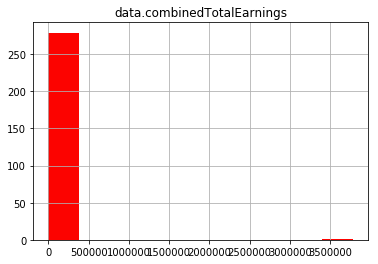

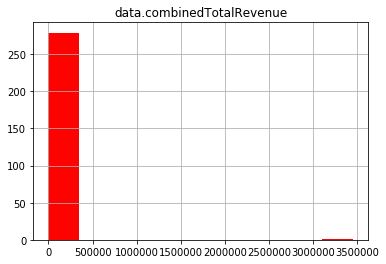

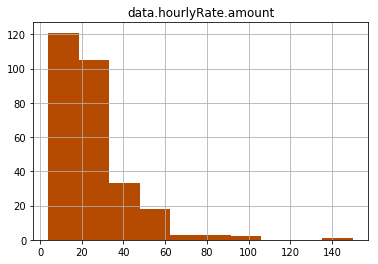

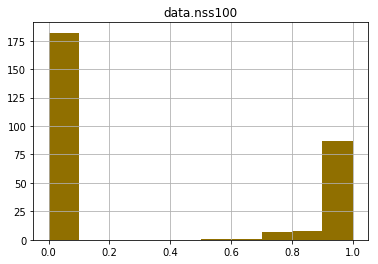

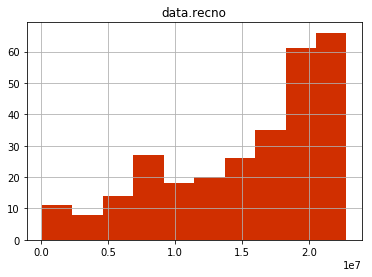

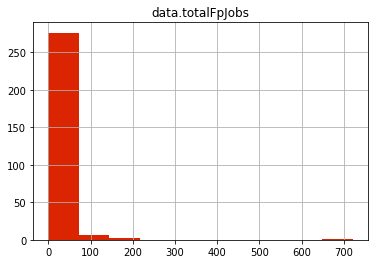

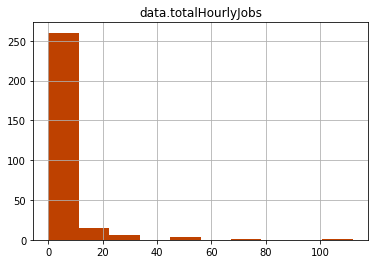

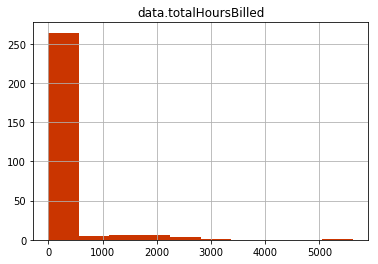

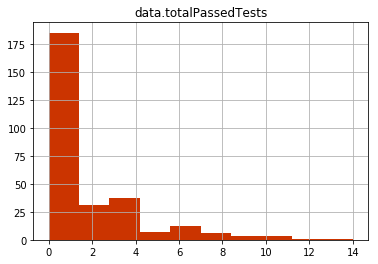

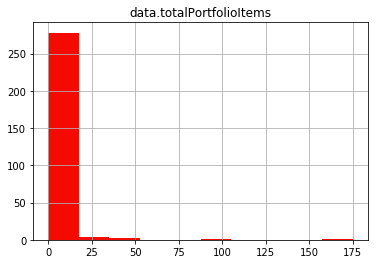

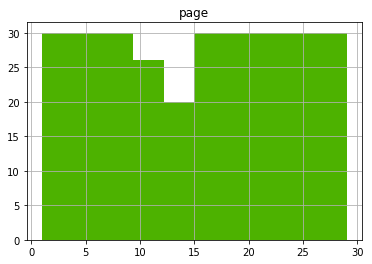

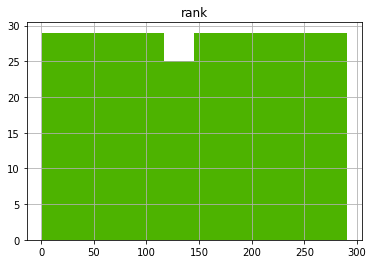

In [10]:
for column, corr in rank_corr.iteritems():
    df.hist(column, color=[(1 - 0.7 * abs(corr), 0.7 * abs(corr), 0)])

In [11]:
df.columns

Index(['data.agencies', 'data.bestMatchServiceUid', 'data.ciphertext',
       'data.combinedAverageRecentEarnings', 'data.combinedRecentEarnings',
       'data.combinedTotalEarnings', 'data.combinedTotalRevenue',
       'data.description', 'data.descriptionSanitized',
       'data.extendedAgencies', 'data.groups', 'data.hideEarnings',
       'data.hideJss', 'data.highlighting',
       'data.highlighting.agencyDescription', 'data.highlighting.agencyName',
       'data.highlighting.agencySummary', 'data.highlighting.blurb',
       'data.highlighting.shortName', 'data.highlighting.skills',
       'data.highlighting.skills.<em>bot</em>-development',
       'data.highlighting.skills.<em>telegram</em>-api',
       'data.highlighting.skills.microsoft-<em>bot</em>-framework',
       'data.highlighting.title', 'data.hourlyRate.amount',
       'data.hourlyRate.currencyCode', 'data.isServiceProfile',
       'data.lastActivity', 'data.location.city', 'data.location.country',
       'data.location.

In [12]:
df['data.skills'] = df['data.skills'].apply(lambda skills: ' '.join([s['skill']['prettyName'].strip() for s in skills]))

In [15]:
df['data.skills'].head()

0    Chatbot Development Node.js Telegram API React...
1    Java Artificial Intelligence NoSQL Automation ...
2    C# PHP API Development ASP.NET Virtual Private...
3    Python Django Blockchain JavaScript Unix Redis...
4    PHP Laravel Framework API Development Bot Deve...
Name: data.skills, dtype: object

In [33]:
def count_word(row, word):
    return ' '.join([row['data.description'], row['data.skills'], row['data.title']]).lower().count(word)

df['telegram_count'] = df.apply(partial(count_word, word='telegram'), axis=1)
df['bot_count'] = df.apply(partial(count_word, word='bot'), axis=1)
df[['telegram_count', 'bot_count']].head()

,telegram_count,bot_count
0,2,3
1,2,10
2,2,2
3,2,2
4,1,4


In [36]:
df[['telegram_count', 'bot_count', 'rank']].corr()['rank']

telegram_count   -0.013759
bot_count        -0.202867
rank              1.000000
Name: rank, dtype: float64